In [291]:
# Import necessary libraries
import numpy as np
import os
from pathlib import Path
from matplotlib import pyplot as plt

### SNR code

In [292]:
def snr(avg_epoch):
    # Calculate the mean and standard deviation of the samples
    mean = np.mean(avg_epoch)**2
    var = np.var(avg_epoch)
    
    # Calculate the SNR
    snr = mean / (var)
    return snr

### Function for SNR plotting

In [293]:
def snr_fun(snr_plt, sorted_keys, title):
    snr_ax = []
    for rms in sorted_keys:
        snr_ax.append(snr_plt[rms])

    fig, axs = plt.subplots(2,1, figsize=(5,5))

    axs[0].plot(snr_ax)
    axs[0].set_title(title)
    axs[0].set(ylabel='SNR -', xlabel='Epoch Index')
    axs[0].grid()

    axs[1].plot(sorted_keys)
    axs[1].set_title("RMS")
    axs[1].set(ylabel='RMS -', xlabel='Epoch Index')
    axs[1].grid()

    plt.tight_layout()
    plt.show()
    return snr_ax


        

# Classic Averaging

In [294]:
def classic_average(epochs):
    #SNR per eppoch plotting
    sorted_epoch = {}
    for epoch in epochs:
        rms = np.sqrt(np.mean(np.array(epoch**2)))
        sorted_epoch[rms] = epoch

    sorted_keys = []
    snr_plt = {}
    epoch_sum = np.zeros(np.shape(epochs)[1])     
    for i, (rms, epoch) in enumerate(sorted_epoch.items()):
        epoch_sum += epoch

        avg_epoch = epoch_sum/(i+1)
        sorted_keys.append(rms)
        snr_avg_epoch = snr(avg_epoch)
        snr_plt[rms] = snr_avg_epoch

    #classic average
    snr_ax = snr_fun(snr_plt,sorted_keys,"SNR - Classic Average")
    average_evoked_potential = avg_epoch#np.mean(epochs, axis=0)
    return average_evoked_potential, snr_ax
    

# Weighted Averaging

In [295]:
def weighted_average(epochs):

    # Code for SNR plotting
    sorted_epoch = {}
    shi_vector = []
    for epoch in epochs:
        rms = np.sqrt(np.mean(np.array(epoch**2)))
        sorted_epoch[rms] = epoch

        variance = np.var(epoch)
        shi_vector.append(1/variance)

    sorted_keys = []
    snr_plt = {}
    
    # Code for actual Weighted Averaging
    avg_epoch = np.zeros(np.shape(epochs)[1])
            
    for rms, epoch in sorted_epoch.items():
        variance = np.var(epoch)
        weight = (1/variance)/np.sum(shi_vector)
        avg_epoch += weight*epoch

        #more snr plotting
        sorted_keys.append(rms)
        snr_avg_epoch = snr(avg_epoch)
        snr_plt[rms] = snr_avg_epoch

    snr_ax = snr_fun(snr_plt,sorted_keys,"SNR - Weighted Average")
    return avg_epoch, snr_ax

# Sorted averaging using RMS

In [296]:

def sorting_averaging(epochs):
  
    sorted_epoch = {}
    for epoch in epochs:
        rms = np.sqrt(np.mean(np.array(epoch**2)))
        #print(rms)
        sorted_epoch[rms] = epoch
        
    sorted_keys = sorted(sorted_epoch, key=lambda x: x)
    sum_sorted_epoch = np.zeros(np.shape(epochs)[1])
    avg_sorted_epoch = []
    max_snr = float("-inf")
    best_key = 0
    
    snr_plt = {}
    for i, rms in enumerate(sorted_keys):
        sum_sorted_epoch = sum_sorted_epoch + sorted_epoch[rms]
        avg_sorted_epoch = sum_sorted_epoch / (i+1)
        snr_avg_epoch = snr(avg_sorted_epoch)
        snr_plt[rms] = snr_avg_epoch
        if(snr_avg_epoch > max_snr):
            max_snr = snr_avg_epoch
            best_key = rms
    
    sum_sorted_epoch = np.zeros(np.shape(epochs)[1])
    avg_sorted_epoch = []
    for i, rms in enumerate(sorted_keys):
        sum_sorted_epoch = sum_sorted_epoch + sorted_epoch[rms]
        avg_sorted_epoch = sum_sorted_epoch / (i+1)
        if(rms == best_key):
            break
    snr_ax = snr_fun(snr_plt,sorted_keys,"SNR - Sorting Average")
    
    return avg_sorted_epoch, snr_ax


# Sorted averaging using Standard deviation

In [297]:
def sorting_averaging_sd(epochs):
  
    sorted_epoch = {}
    for epoch in epochs:
        rms = np.sqrt(np.var(np.array(epoch)))
        sorted_epoch[rms] = epoch
        
    sorted_keys = sorted(sorted_epoch, key=lambda x: x)
    sum_sorted_epoch = np.zeros(np.shape(epochs)[1])
    avg_sorted_epoch = []
    max_snr = float("-inf")
    best_key = 0
    
    snr_plt = {}
    for i, rms in enumerate(sorted_keys):
        sum_sorted_epoch = sum_sorted_epoch + sorted_epoch[rms]
        avg_sorted_epoch = sum_sorted_epoch / (i+1)
        snr_avg_epoch = snr(avg_sorted_epoch)
        snr_plt[rms] = snr_avg_epoch
        if(snr_avg_epoch > max_snr):
            max_snr = snr_avg_epoch
            best_key = rms
    
    sum_sorted_epoch = np.zeros(np.shape(epochs)[1])
    avg_sorted_epoch = []
    for i, rms in enumerate(sorted_keys):
        sum_sorted_epoch = sum_sorted_epoch + sorted_epoch[rms]
        avg_sorted_epoch = sum_sorted_epoch / (i+1)
        if(rms == best_key):
            break
    snr_ax = snr_fun(snr_plt,sorted_keys,"SNR - Sorting Average")
    
    return avg_sorted_epoch, snr_ax

# RUNS and Prints

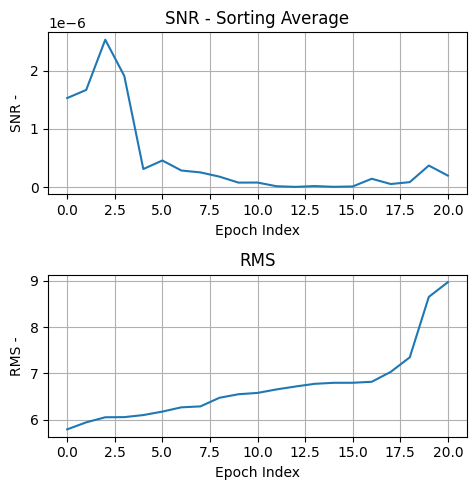

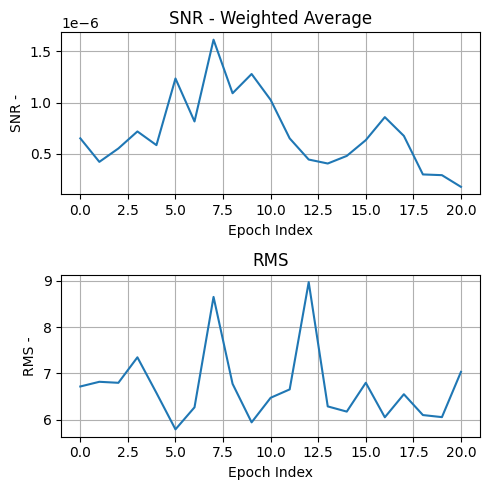

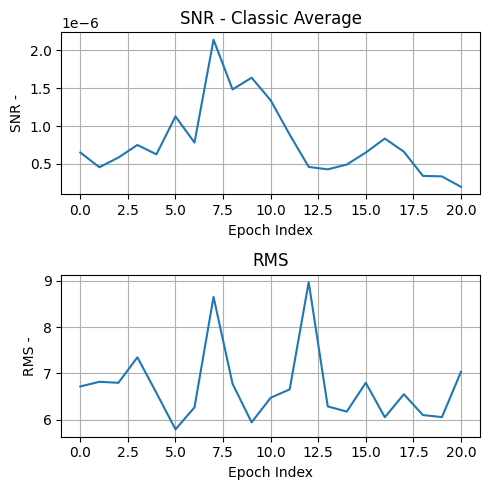

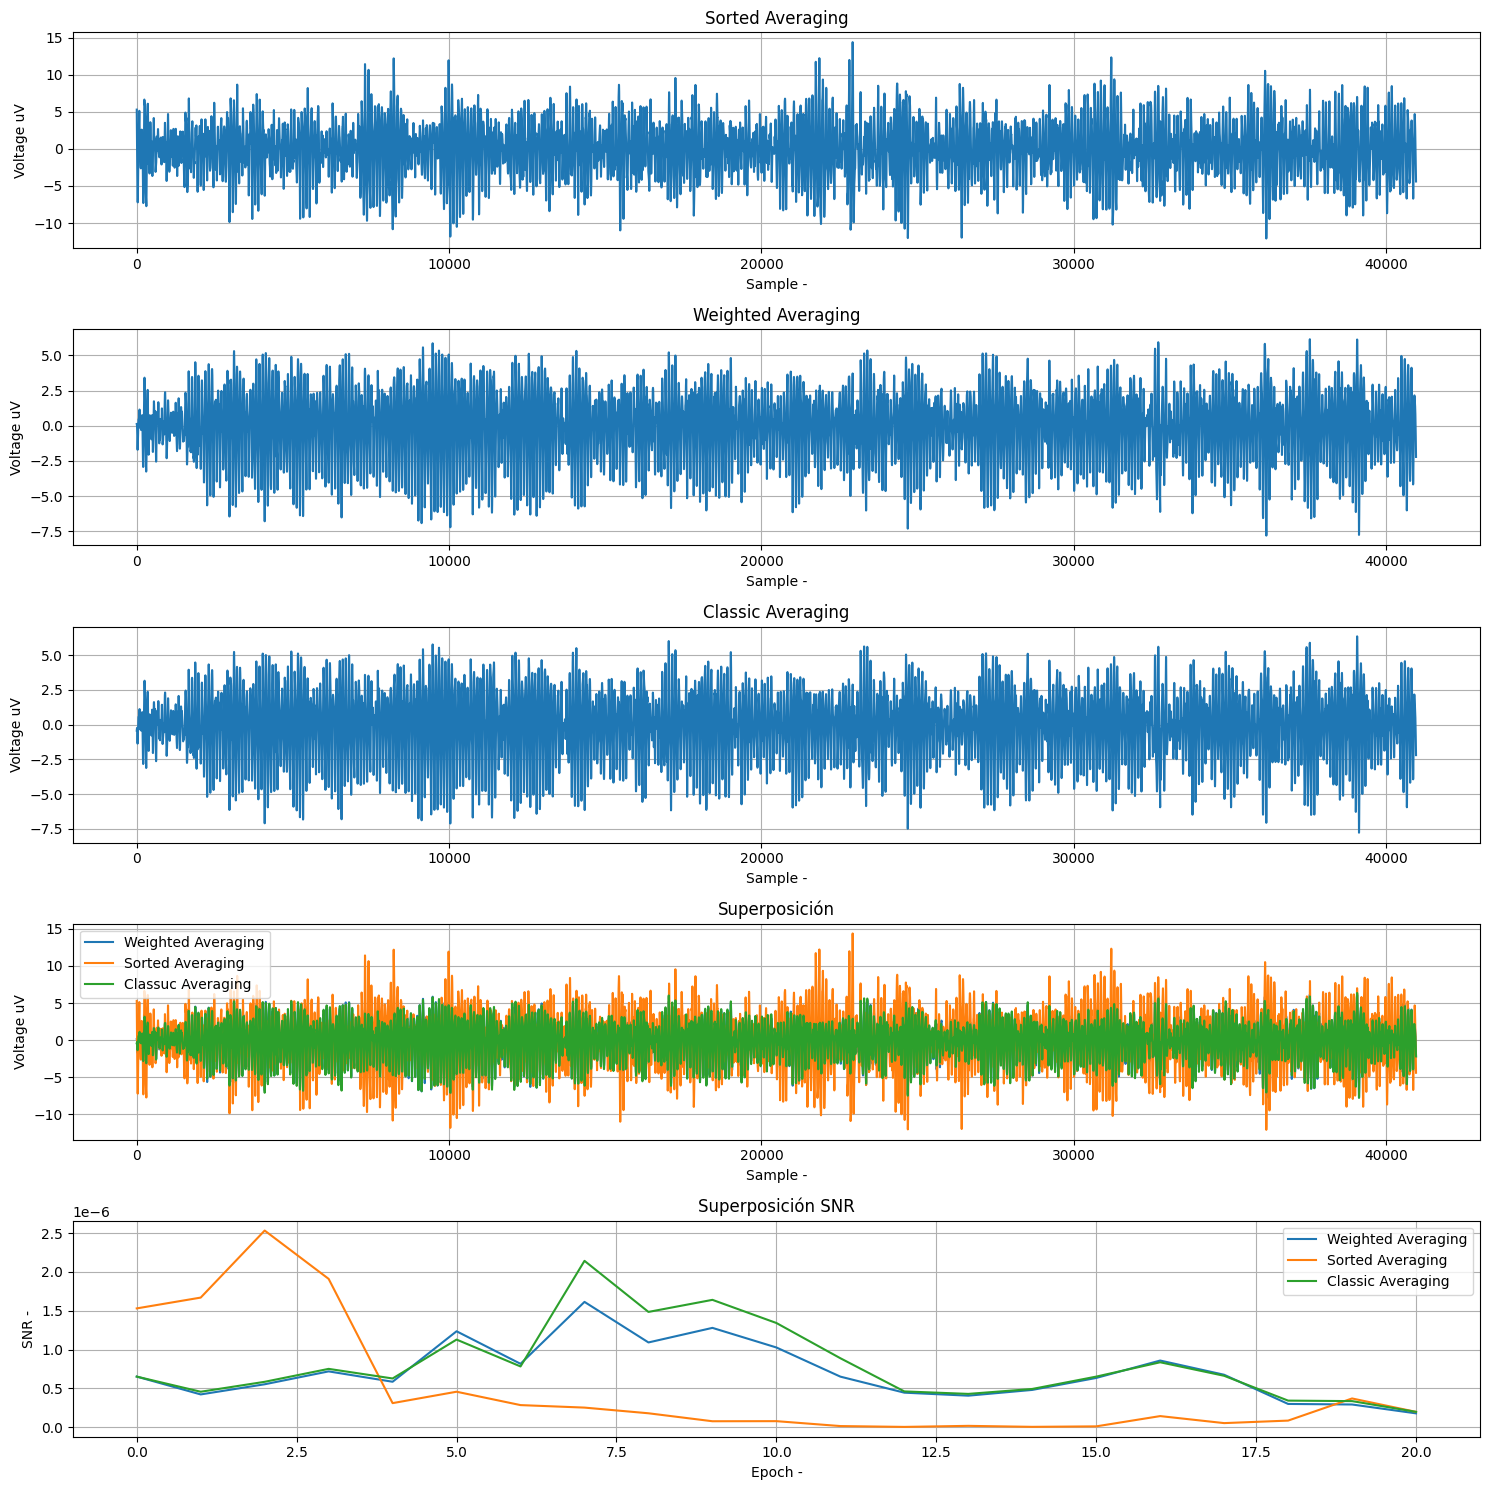

In [298]:
loadPath = os.path.abspath('')+'\data'
archivos = os.listdir(loadPath)

electrodo = 29 # columna de la data a revisar

epochs = []
for i, arch in enumerate(archivos):
    data = np.loadtxt(loadPath+'/'+arch)
    
    epoch = data[:,electrodo-1]
    epochs.append(np.array(epoch))

sorting_avg_evoked_potential, snr_sorted = sorting_averaging(epochs)
weighted_avg__evoked_potential, snr_weighted = weighted_average(epochs)
average_evoked_potential, snr_average = classic_average(epochs)

fig, axs = plt.subplots(5,1, figsize=(15, 15))

axs[0].plot(sorting_avg_evoked_potential)
axs[0].set_title("Sorted Averaging")
axs[0].set(ylabel='Voltage uV', xlabel='Sample -')
axs[0].grid()

axs[1].plot(weighted_avg__evoked_potential)
axs[1].set_title("Weighted Averaging")
axs[1].set(ylabel='Voltage uV', xlabel='Sample -')
axs[1].grid()


axs[2].plot(average_evoked_potential)
axs[2].set_title("Classic Averaging")
axs[2].set(ylabel='Voltage uV', xlabel='Sample -')
axs[2].grid() 


axs[3].set_title("Superposición")
axs[3].plot(weighted_avg__evoked_potential, label="Weighted Averaging")
axs[3].plot(sorting_avg_evoked_potential, label="Sorted Averaging")
axs[3].plot(average_evoked_potential, label="Classuc Averaging")
axs[3].set(ylabel='Voltage uV', xlabel='Sample -')
axs[3].grid()
axs[3].legend()

axs[4].set_title("Superposición SNR")
axs[4].plot(snr_weighted, label="Weighted Averaging")
axs[4].plot(snr_sorted, label="Sorted Averaging")
axs[4].plot(snr_average, label="Classic Averaging")
axs[4].set(ylabel='SNR -', xlabel='Epoch -')
axs[4].grid()
axs[4].legend()

plt.tight_layout()
plt.show()  

# Comparacion entre estimador de ruido RMS y SD

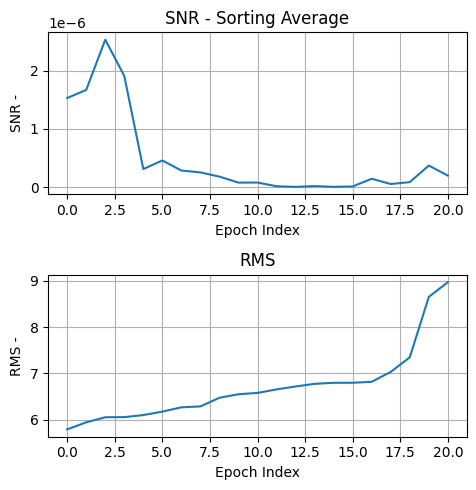

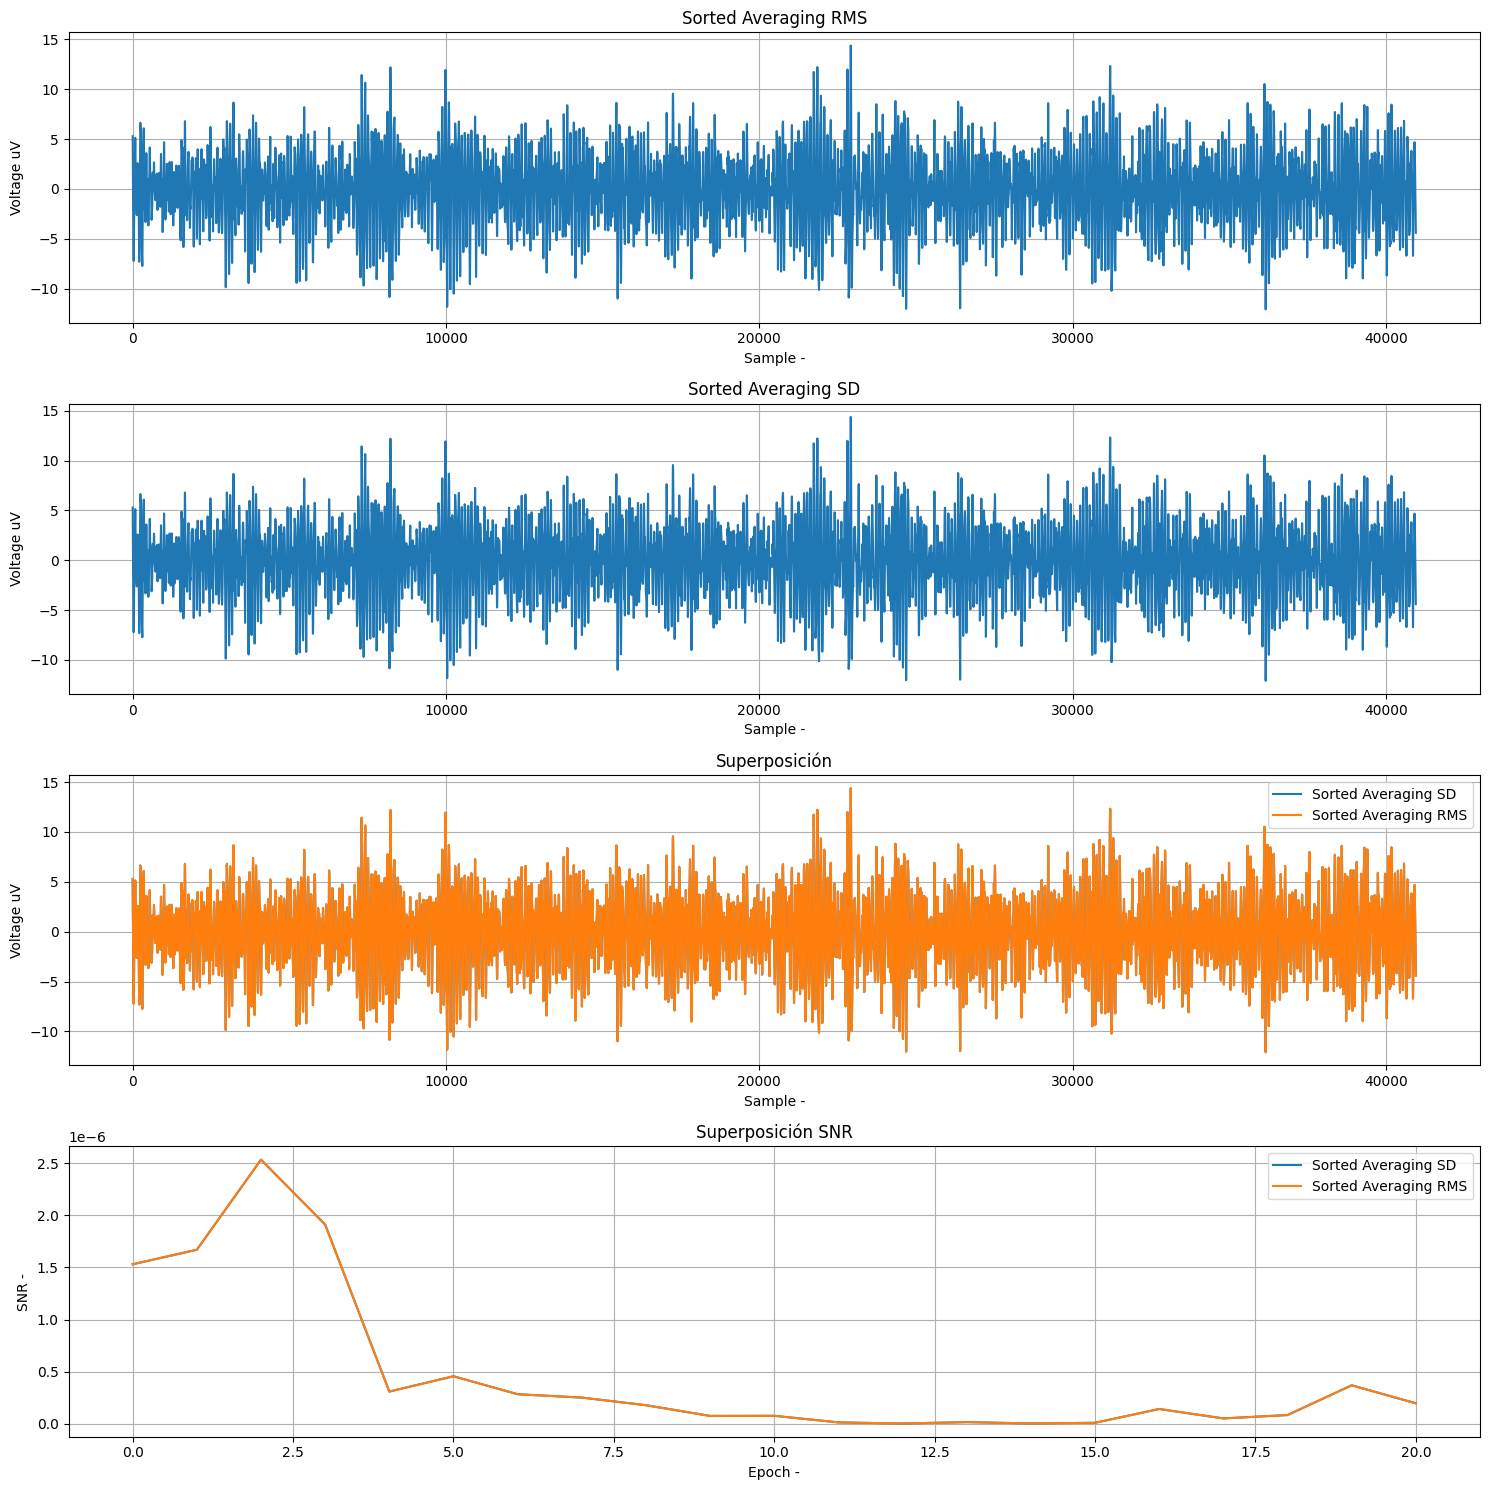

In [299]:
sorting_avg_evoked_potential_sd, snr_sorted_sd = sorting_averaging_sd(epochs)


fig, axs = plt.subplots(4,1, figsize=(15, 15))

axs[0].plot(sorting_avg_evoked_potential)
axs[0].set_title("Sorted Averaging RMS")
axs[0].set(ylabel='Voltage uV', xlabel='Sample -')
axs[0].grid()

axs[1].plot(sorting_avg_evoked_potential_sd)
axs[1].set_title("Sorted Averaging SD")
axs[1].set(ylabel='Voltage uV', xlabel='Sample -')
axs[1].grid()

axs[2].set_title("Superposición")
axs[2].plot(sorting_avg_evoked_potential_sd, label="Sorted Averaging SD")
axs[2].plot(sorting_avg_evoked_potential, label="Sorted Averaging RMS")
axs[2].set(ylabel='Voltage uV', xlabel='Sample -')
axs[2].grid()
axs[2].legend()


axs[3].set_title("Superposición SNR")
axs[3].plot(snr_sorted_sd, label="Sorted Averaging SD")
axs[3].plot(snr_sorted, label="Sorted Averaging RMS")
axs[3].set(ylabel='SNR -', xlabel='Epoch -')
axs[3].grid()
axs[3].legend()

plt.tight_layout()

plt.show()  


# SNR finales

In [300]:
print(snr(sorting_avg_evoked_potential))
print(snr(sorting_avg_evoked_potential_sd))
print(snr(weighted_avg__evoked_potential))
print(snr(average_evoked_potential))


2.5330631674043543e-06
2.5330631674043543e-06
1.77001532825529e-07
1.9625486179697876e-07
